<a href="https://colab.research.google.com/github/erinmcmahon26/School_EDA/blob/main/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [1]:
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['housing_prices_train_data.csv']))

Saving housing_prices_train_data.csv to housing_prices_train_data (2).csv


In [84]:
from google.colab import files
uploaded = files.upload()
import io
df_test = pd.read_csv(io.BytesIO(uploaded['housing_prices_test.csv']))

Saving housing_prices_test.csv to housing_prices_test (1).csv


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
pd.set_option("display.max_rows", None)

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_train.describe(include = "O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [87]:
df_test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [56]:
df_train.fillna(0, inplace=True)

In [57]:
df_test.fillna(0, inplace=True)

### Assessing Dependent Variable

In [61]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
sns.boxplot(x='SalePrice', data=df_train)

In [ ]:
sns.histplot(x='SalePrice', data = df_train)

### Outlier Removal

In [12]:
# took out outliers based on boxplot outlier indications
outliers = df_train[df_train['SalePrice'] > 350000]
len(outliers)

54

In [13]:
# created new df excluding outliers
df_train2 = df_train[df_train['SalePrice'] <= 350000]

In [ ]:
sns.histplot(x='SalePrice', data = df_train2)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_train2)

### Search For Features

In [14]:
# combine like features 
df_train2['TotalBath'] = df_train2['BsmtFullBath'] + 0.5*(df_train2['BsmtHalfBath']) +df_train2['FullBath'] + 0.5*(df_train2['HalfBath'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
# combine like features for test
df_test['TotalBath'] = df_test['BsmtFullBath'] + 0.5*(df_test['BsmtHalfBath']) + df_test['FullBath'] + 0.5*(df_test['HalfBath'])

In [62]:
corr_matrix = df_train2.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.786782
GrLivArea        0.668598
TotalBath        0.640550
GarageCars       0.633250
GarageArea       0.613226
FullBath         0.581281
YearBuilt        0.563842
TotalBsmtSF      0.546806
YearRemodAdd     0.539863
1stFlrSF         0.525214
GarageYrBlt      0.507040
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
MasVnrArea       0.366384
2ndFlrSF         0.326451
OpenPorchSF      0.325439
LotFrontage      0.324234
WoodDeckSF       0.306803
BsmtFinSF1       0.303796
HalfBath         0.285982
LotArea          0.246926
BsmtUnfSF        0.213847
BsmtFullBath     0.209889
BedroomAbvGr     0.206744
Neigh_Code       0.169452
ScreenPorch      0.102655
MoSold           0.074079
PoolArea         0.046710
3SsnPorch        0.040766
BsmtFinSF2       0.002779
MiscVal         -0.013894
Id              -0.016095
BsmtHalfBath    -0.021942
YrSold          -0.031760
OverallCond     -0.049012
LowQualFinSF    -0.058591
MSSubClass      -0.058979
EnclosedPorc

Text(0.5, 1.0, 'Correlation Housing Prices Features')

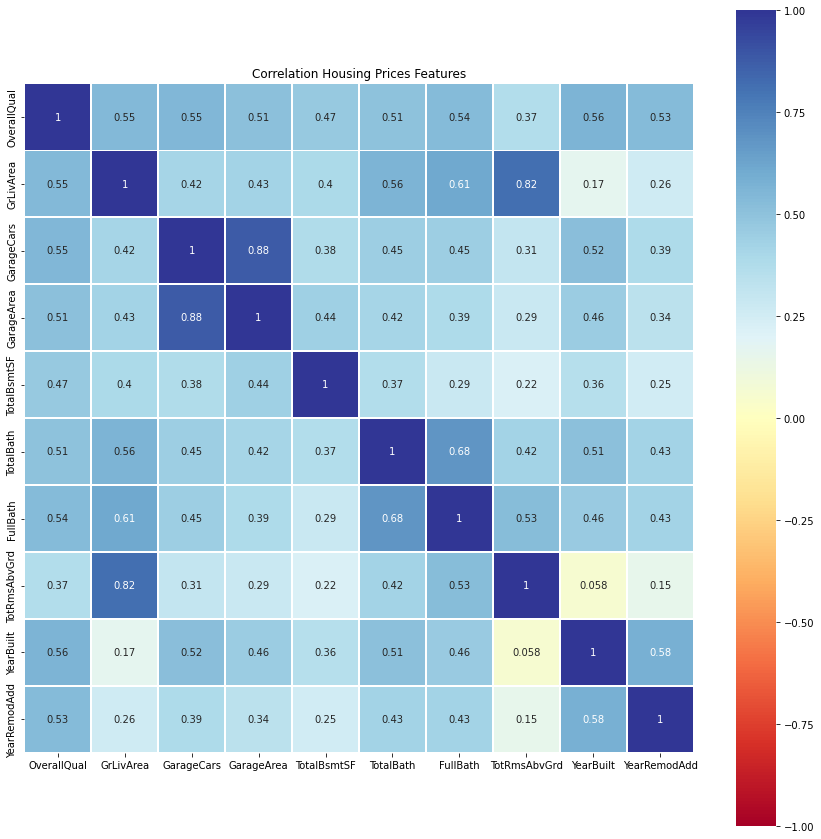

In [16]:
# pull out top 10 most correlated quantitative variables
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd']
df_train2_corr = df_train2[columns]
df_train2_corr.corr()

corrmat = df_train2_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

In [ ]:
sns.pairplot(df_train2_corr)

In [ ]:
df_train2.plot(kind='scatter', x= 'OverallQual', y = 'SalePrice', alpha = 0.1)

In [ ]:
df_train2.plot(kind='scatter', x= 'GrLivArea', y = 'SalePrice', alpha = 0.1)

In [ ]:
df_train2.plot(kind='scatter', x= 'TotalBath', y = 'SalePrice', alpha = 0.1)

In [ ]:
df_train2[['SalePrice','OverallQual']].groupby('OverallQual').describe()

In [ ]:
df_train2[['SalePrice','TotalBath']].groupby('TotalBath').describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBath', y='SalePrice', hue='OverallQual', data=df_train2)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df_train2)

#### Assess Categorical Variables

WHY???

In [17]:
df_train2_cat = df_train2.select_dtypes(include='object')

In [18]:
df_train2_cat['SalePrice'] = df_train2.loc[:,'SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train2_cat.info()

In [20]:
pip install dython

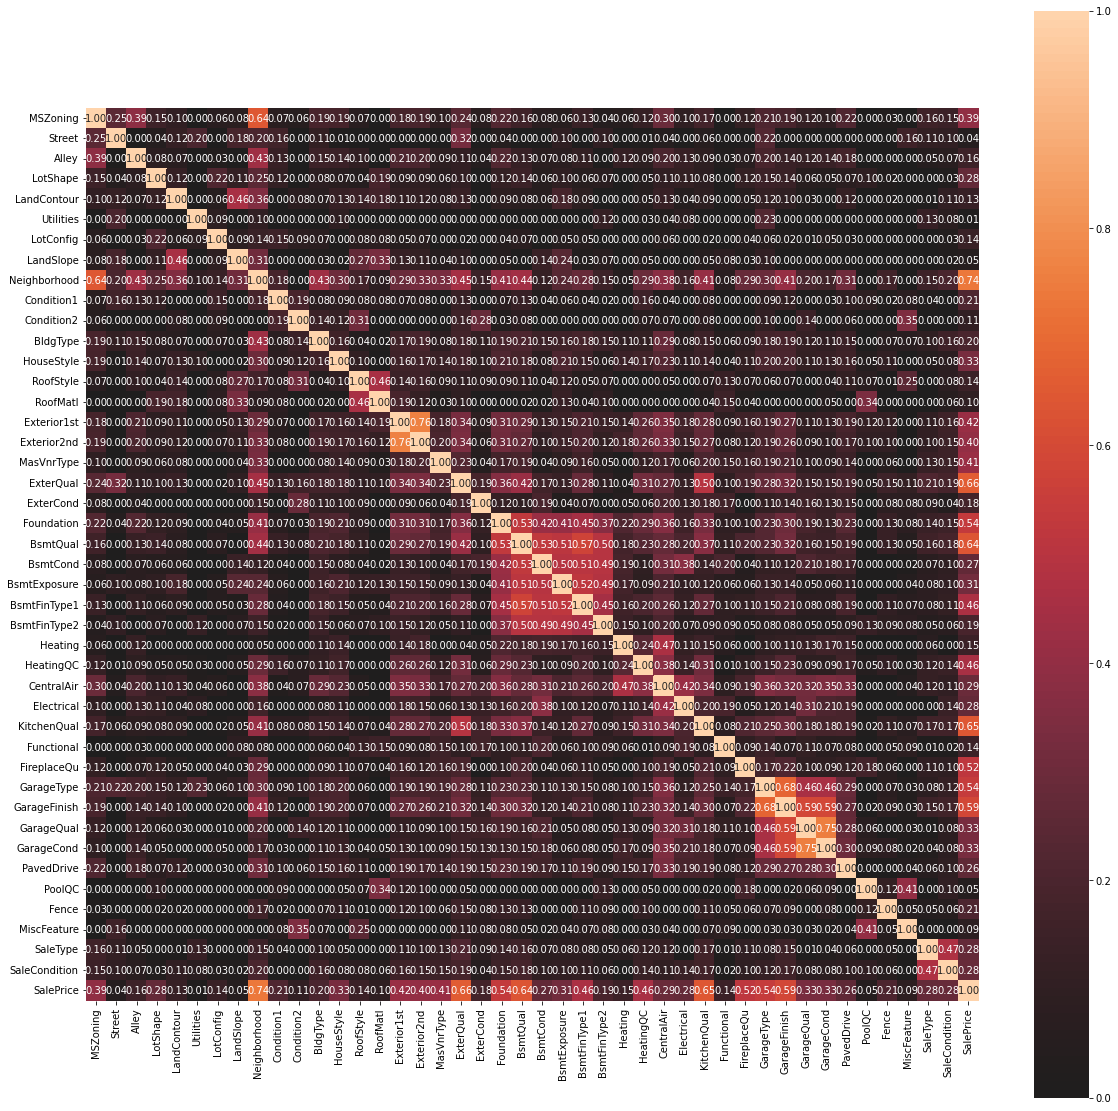

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fae8385e490>,
 'corr':                MSZoning    Street     Alley  ...  SaleType  SaleCondition  SalePrice
 MSZoning       1.000000  0.249014  0.390464  ...  0.159376       0.145614   0.393303
 Street         0.249014  1.000000  0.000000  ...  0.109514       0.104600   0.044395
 Alley          0.390464  0.000000  1.000000  ...  0.049342       0.069369   0.156227
 LotShape       0.154713  0.041146  0.079783  ...  0.000000       0.027188   0.278998
 LandContour    0.103926  0.117259  0.069888  ...  0.011514       0.107909   0.130651
 Utilities      0.000000  0.201197  0.000000  ...  0.129918       0.075768   0.014860
 LotConfig      0.062523  0.000000  0.034462  ...  0.000000       0.034506   0.137562
 LandSlope      0.075151  0.182923  0.000000  ...  0.000000       0.024160   0.049486
 Neighborhood   0.641332  0.200445  0.430315  ...  0.154885       0.199718   0.736285
 Condition1     0.065694  0.164246  0.127453  ...  0.037595       

In [63]:
from dython.nominal import associations
associations(df_train2_cat, figsize=(20,20))

This correlation between sale price and the categorical variables shows that neighborhood and external quality could be considered good predictors.

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
neigh_cat_encoded = ordinal_encoder.fit_transform(df_train2[['Neighborhood']])
df_train2['Neigh_Code'] = neigh_cat_encoded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
extqual_cat_encoded = ordinal_encoder.fit_transform(df_train2[['ExterQual']])
df_train2['ExtQual_Code'] = extqual_cat_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
kitchqual_cat_encoded = ordinal_encoder.fit_transform(df_train2[['KitchenQual']])
df_train2['KitchQual_Code'] = kitchqual_cat_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
#make sure new columns added
df_train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,Neigh_Code,ExtQual_Code,KitchQual_Code
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.5,5.0,2.0,2.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.5,24.0,3.0,3.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.5,5.0,2.0,2.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0,6.0,3.0,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.5,15.0,2.0,2.0


In [91]:
# for test
neigh_cat_encoded = ordinal_encoder.fit_transform(df_test[['Neighborhood']])
df_test['Neigh_Code'] = neigh_cat_encoded

In [92]:
extqual_cat_encoded = ordinal_encoder.fit_transform(df_test[['ExterQual']])
df_test['ExtQual_Code'] = extqual_cat_encoded

In [93]:
df_test.drop(df_test.index[df_test['KitchenQual'] == 0], inplace=True)

In [94]:
kitchqual_cat_encoded = ordinal_encoder.fit_transform(df_test[['KitchenQual']])
df_test['KitchQual_Code'] = kitchqual_cat_encoded

In [40]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,Neigh_Code,ExtQual_Code
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1.0,12.0,3.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1.5,12.0,3.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2.5,8.0,3.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2.5,8.0,3.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.0,22.0,2.0


### Drop Features Not Used for Model

In [95]:
features = df_train2[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'Neigh_Code', 'ExtQual_Code', 'KitchQual_Code']]

In [98]:
test_features = df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'Neigh_Code', 'ExtQual_Code', 'KitchQual_Code']]

## Feature Scaling

In [ ]:
# Min Max Scaling
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
sale_scaled = scaler.fit_transform(df_train2[['SalePrice']])
sale_scaled

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_2 = StandardScaler()
standard_sale_scaled = scaler_2.fit_transform(df_train2[['SalePrice']])
standard_sale_scaled

## Modeling

### Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [28]:
import statsmodels.api as sm

y = df_train2['SalePrice']
x = df_train2['OverallQual']
x = sm.add_constant(x)

lm = sm.OLS(y,x).fit()
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2281.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):          1.66e-296
Time:                        20:06:26   Log-Likelihood:                -16794.
No. Observations:                1406   AIC:                         3.359e+04
Df Residuals:                    1404   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.956e+04   4725.922    -10.487      0.000   -5.88e+04   -4.03e+04
OverallQual  3.681e+04    770.674     47.763      0.000    3.53e+04    3.83e+04
==============================================================================
Omnibus:                       36.969   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.539
Skew:                           0.229   Prob(JB):                     1.18e-13
Kurtosis:                       3.898   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = 36810 * x['OverallQual'] - 49560

In [ ]:
sns.scatterplot(x=x['OverallQual'], y=y)
sns.lineplot(x=x['OverallQual'], y=y_pred, color='red')

### Multiple Linear Regression Model

In [99]:
y = df_train2['SalePrice']
x2 = features

lin_reg = LinearRegression()
lin_reg.fit(x2, y)

LinearRegression()

In [ ]:
# look at summary statistics
x2 = sm.add_constant(x2)

mul_lm = sm.OLS(y,x2).fit()
mul_lm.summary()

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df_train2[['OverallQual']]
y = df_train2['SalePrice']

tree_reg = DecisionTreeRegressor(max_depth=10, random_state=0)
tree_reg.fit(X,y)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = tree_reg.predict(X)
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
rmse


In [ ]:
sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
plt.plot(df_train2['OverallQual'].sort_values(), tree_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

In [ ]:
sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
plt.plot(df_train2['OverallQual'].sort_values(), forest_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()

### Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [33]:
# linear regression scores
lin_scores = cross_val_score(lin_reg, x, y,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [35710.91013047 38533.01599977 40764.05074441 39723.88160059
 41068.80563347 32707.32082215 31848.44152987 36779.49122965
 37964.38172998 36569.79045718]
Mean: 37167.00898775352
Standard deviation: 2966.5661070603524


In [100]:
# multiple linear regression
ml_scores = cross_val_score(lin_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

ml_rmse_scores = np.sqrt(-ml_scores)
display_scores(ml_rmse_scores)

Scores: [23846.23575395 26783.66463171 23556.58486229 33877.04018716
 28650.76877918 20553.68349718 22941.32537588 25373.8010549
 45372.06477813 25374.87767828]
Mean: 27633.004659864273
Standard deviation: 6846.225631442274


In [ ]:
# Decision Tree Scores
scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

In [ ]:
# Random Forest Scores
forest_scores = cross_val_score(forest_reg, X, y,
                              scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

## Generate Submission

In [60]:
x = test_features
test_preds = lin_reg.predict(x)

In [18]:
output = pd.DataFrame({'Id': df_test.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)